In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston

In [3]:
import warnings
warnings.filterwarnings('ignore')
# 문제가 되지않는 일반적인 경고 무시

In [4]:
boston = load_boston()

In [5]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [6]:
data = pd.DataFrame(data,columns=columns)
data.shape

(506, 13)

In [7]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_tr,X_te,y_tr,y_te = train_test_split(data,label,test_size=0.2,random_state=2022)
X_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11
288,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,0.05425,0.0,4.05,0.0,0.510,6.315,73.4,3.3175,5.0,296.0,16.6,395.60,6.29
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71


In [8]:
sim_lr = LinearRegression()
sim_lr.fit(X_tr.RM.values.reshape((-1,1)),y_tr)
print(sim_lr.score(X_tr.RM.values.reshape(-1,1),y_tr))
print(sim_lr.score(X_te.RM.values.reshape(-1,1),y_te))
y_pred = sim_lr.predict(X_te.RM.values.reshape(-1,1))   

0.5275595230006717
0.21214837107432338


In [9]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(f'단순 선형 회귀,R2: {r2_score(y_te,y_pred):.4f}')

단순 선형 회귀,R2: 0.2121


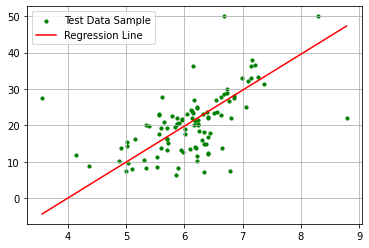

In [10]:
# 결과 시각화 하기
line_x = np.linspace(np.min(X_te.RM),np.max(X_te.RM),10)
line_y = sim_lr.predict(line_x.reshape(-1,1))

plt.scatter(X_te.RM,y_te,s=10,c='green',label='Test Data Sample')
plt.plot(line_x,line_y,c='red',label='Regression Line')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [11]:
# Multiple Linear Regression
mul_lr = LinearRegression()
mul_lr.fit(X_tr,y_tr)

LinearRegression()

In [12]:
y_pred = mul_lr.predict(X_te)
mul_lr.score(X_te,y_te)

0.6225687597000804

In [13]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=4)

In [14]:
dt_regr.fit(X_tr.RM.values.reshape(-1,1),y_tr)

DecisionTreeRegressor(max_depth=4)

In [15]:
y_pred = dt_regr.predict(X_te.RM.values.reshape(-1,1))
r2_score(y_te,y_pred)

0.3816400331702865

In [16]:



arr = np.arange(1,11)
R2 = []
dep = []
for i in arr:
    dt_regr = DecisionTreeRegressor(max_depth=i)
    dt_regr.fit(X_tr.RM.values.reshape(-1,1),y_tr)
    y_pred = dt_regr.predict(X_te.RM.values.reshape(-1,1))
    score = r2_score(y_te,y_pred)
    depth = i
    R2.append(score)
    dep.append(depth)
print(f'최적의 결과는 depth={dep[R2.index(max(R2))]} r2={max(R2):.4f}')



최적의 결과는 depth=3 r2=0.3931


In [17]:
dt_regr = DecisionTreeRegressor(max_depth=5)
dt_regr.fit(X_tr,y_tr)
dt_regr.score(X_te,y_te)

0.7008213897889912

In [18]:



arr = np.arange(1,11)
R2 = []
dep = []
for i in arr:
    dt_regr = DecisionTreeRegressor(max_depth=i)
    dt_regr.fit(X_tr,y_tr)
    y_pred = dt_regr.predict(X_te)
    score = r2_score(y_te,y_pred)
    depth = i
    R2.append(score)
    dep.append(depth)
print(f'최적의 결과는 depth={dep[R2.index(max(R2))]} r2={max(R2):.4f}')



최적의 결과는 depth=9 r2=0.7493


In [19]:
# Support Vector Machine Regressor
from sklearn.svm import SVR
svm_regr = SVR()
svm_regr.fit(X_tr.RM.values.reshape(-1,1),y_tr)
svm_regr.score(X_te.RM.values.reshape(-1,1),y_te)

0.37633763455704405

In [20]:
# Support Vector Machine Regressor
from sklearn.svm import SVR
svm_regr = SVR(C=2)
# C= 일반화가 되기까지 허용하는 개수 기본값은 1
svm_regr.fit(X_tr.RM.values.reshape(-1,1),y_tr)
svm_regr.score(X_te.RM.values.reshape(-1,1),y_te)

0.4201586726034344

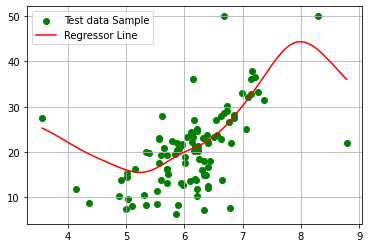

In [21]:
# 결과의 시각화
line_x = np.linspace(np.min(X_te.RM),np.max(X_te.RM),100)
line_y = svm_regr.predict(line_x.reshape(-1,1))

plt.scatter(X_te['RM'],y_te,c='green')
plt.plot(line_x,line_y,c='red')
plt.grid()
plt.legend(['Test data Sample','Regressor Line'],loc='upper left')
plt.show()

In [22]:
svm_regr = SVR(C=20)
svm_regr.fit(X_tr,y_tr)
svm_regr.score(X_te,y_te)

0.42337800119334734

In [116]:
arr = [t for t in range(224000,230000,100)]
score = []
for i in arr:
    svm_regr = SVR(C=i)
    svm_regr.fit(X_tr,y_tr)
    sc = svm_regr.score(X_te,y_te)
    score.append(sc)
print(max(score))
print(arr[score.index(max(score))])

0.7601441065839603
224400


In [104]:
# Multi Layer Perceptron Regressor 다중 MLP 회귀
from sklearn.neural_network import MLPRegressor
mlp_regr = MLPRegressor(solver='adam',hidden_layer_sizes=300,max_iter=300) #lbfgs, sgd, adam
mlp_regr.fit(X_tr,y_tr)
mlp_regr.score(X_te,y_te)

0.6257304046566918